## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [29]:
df = pd.read_csv('Data/StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [6]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Preprocessing Data

In [7]:
df.dropna(inplace=True)

In [8]:
encoding = {
    'Parental_Involvement': {'Low': 0 , 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0 , 'Medium': 1, 'High': 2},
    'Extracurricular_Activities': {'Yes': 1, 'No': 0},
    'Motivation_Level': {'Low': 0 , 'Medium': 1, 'High': 2},
    'Internet_Access': {'Yes': 1, 'No': 0},
    'Family_Income': {'Low': 0 , 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0 , 'Medium': 1, 'High': 2},
    'School_Type': {'Public': 1, 'Private': 0},
    'Peer_Influence': {'Negative': 0 , 'Neutral': 1, 'Positive': 2},
    'Learning_Disabilities': {'Yes': 1, 'No': 0},
    'Parental_Education_Level': {'High School': 0 , 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Far': 0 , 'Moderate': 1, 'Near': 2},
    'Gender': {'Male': 1, 'Female': 0},

}

df.replace(encoding, inplace=True)
df

<ipython-input-8-fa38f7728bfe>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding, inplace=True)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,0,1,0,0,1,1,2,3,0,0,2,1,67
1,19,64,0,1,0,8,59,0,1,2,1,1,1,0,4,0,1,1,0,61
2,24,98,1,1,1,7,91,1,1,2,1,1,1,1,4,0,2,2,1,74
3,29,89,0,1,1,8,98,1,1,1,1,1,1,0,4,0,0,1,1,71
4,19,92,1,1,1,6,65,1,1,3,1,2,1,1,4,0,1,2,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,1,1,1,2,1,1,2,2,0,0,2,0,68
6603,23,76,2,1,0,8,81,1,1,3,0,2,1,2,2,0,0,2,0,69
6604,20,90,1,0,1,6,65,0,1,3,0,1,1,0,2,0,2,2,0,68
6605,10,86,2,2,1,6,91,2,1,2,0,1,0,2,3,0,0,0,0,68


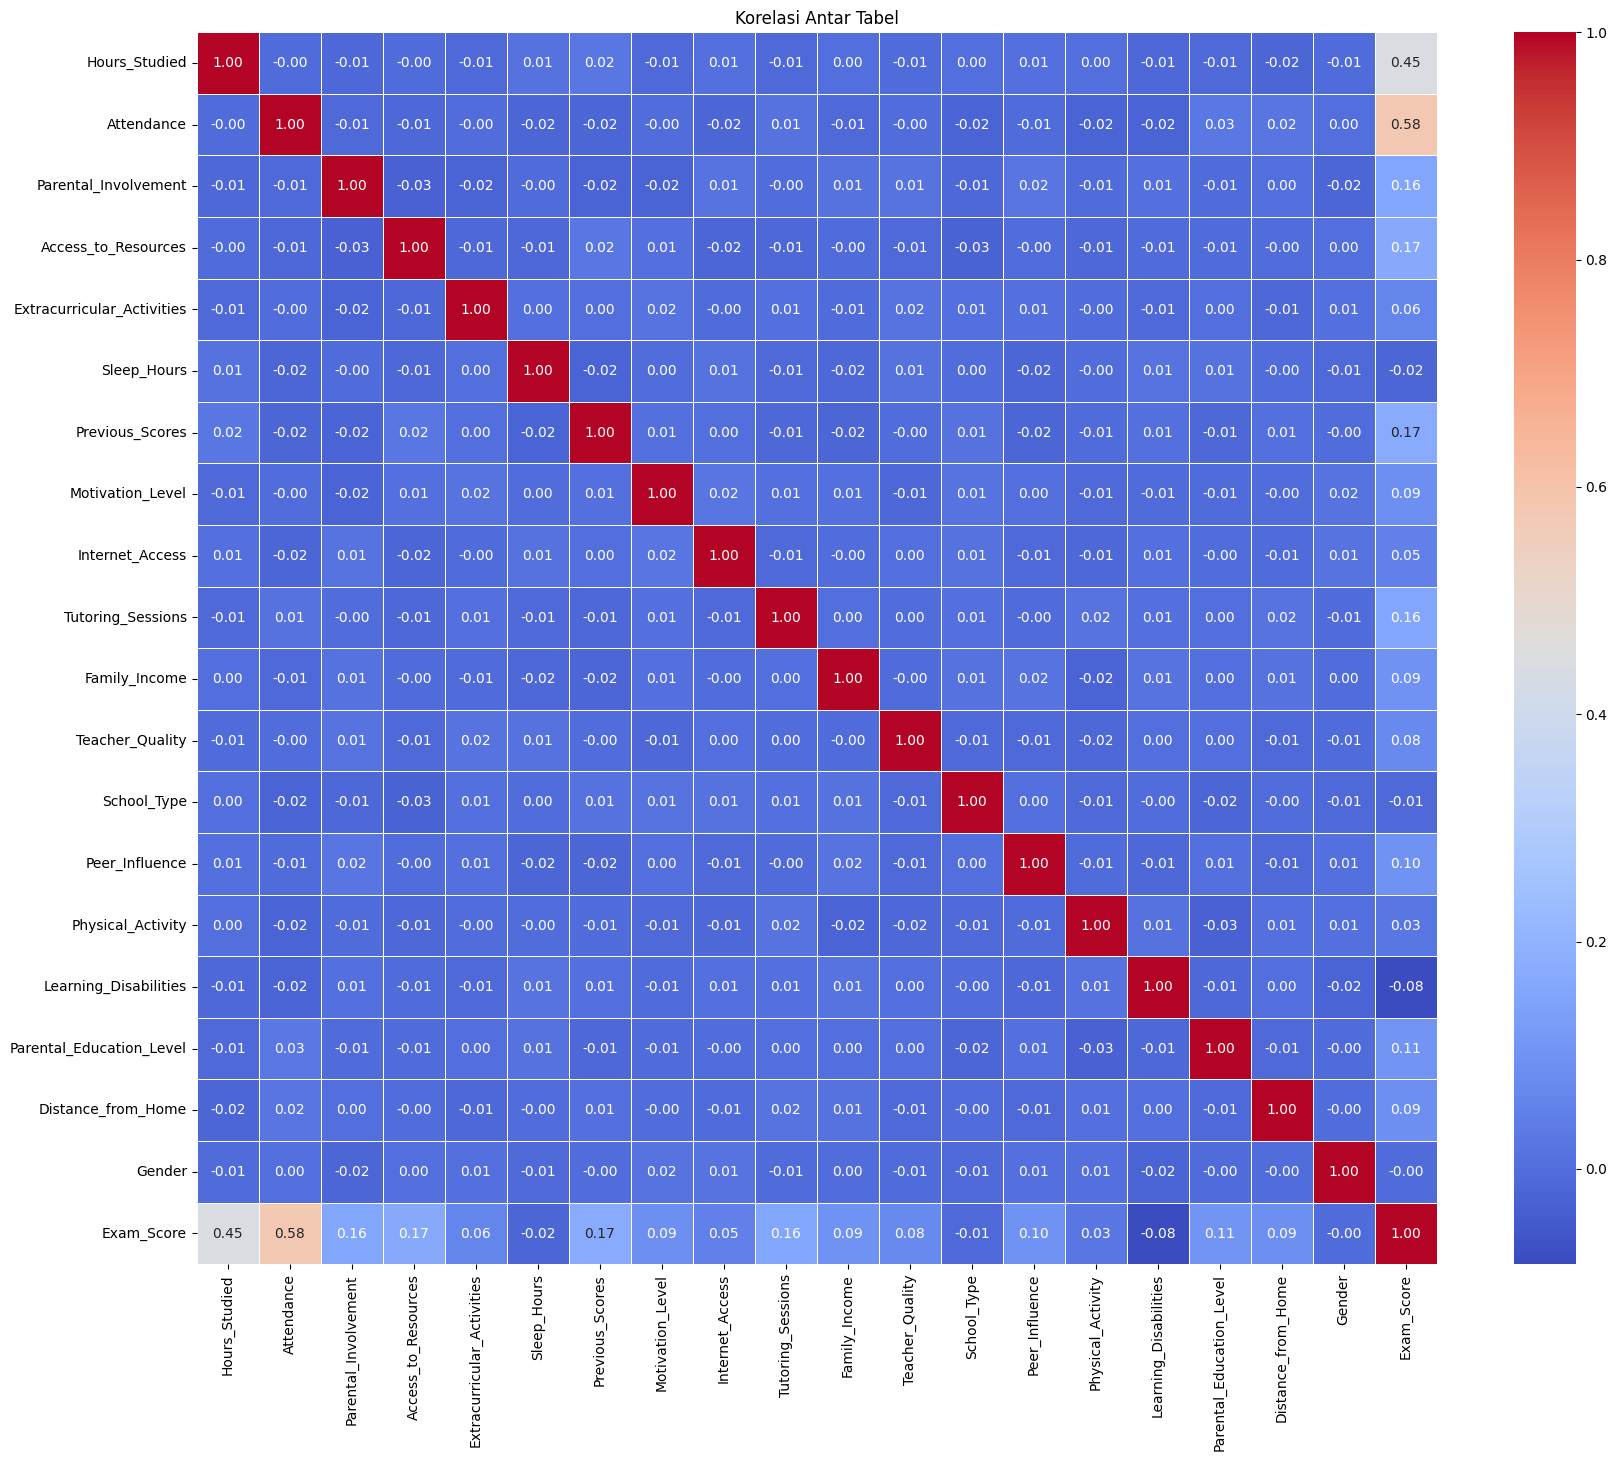

In [9]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Tabel")
plt.show()

In [10]:
top_correlations = correlation_matrix["Exam_Score"].abs().sort_values(ascending=False).head(10)
print(top_correlations)

Exam_Score                  1.000000
Attendance                  0.580259
Hours_Studied               0.445104
Previous_Scores             0.174283
Access_to_Resources         0.167856
Tutoring_Sessions           0.156829
Parental_Involvement        0.156014
Parental_Education_Level    0.105253
Peer_Influence              0.099133
Family_Income               0.094555
Name: Exam_Score, dtype: float64


## Outliers

In [11]:
print(df['Exam_Score'].unique())

[ 67  61  74  71  70  66  69  72  68  65  64  60  63  62 100  76  79  73
  78  89  75  59  86  97  83  84  80  58  94  55  92  82  77 101  88  91
  99  87  57  96  98  95  85  93  56]


In [12]:
df['Exam_Score'] = df['Exam_Score'].replace(101, 100)

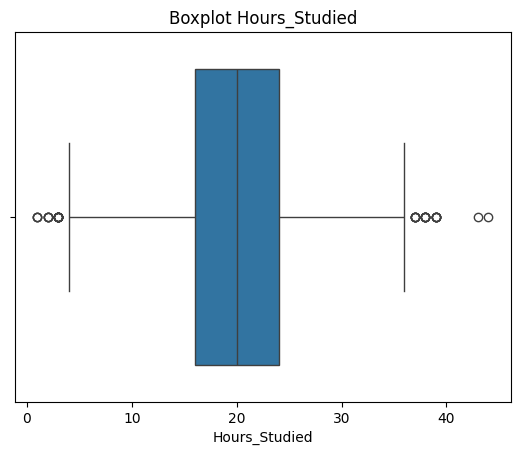

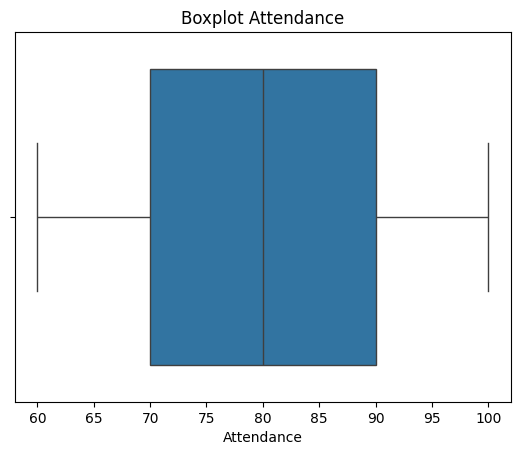

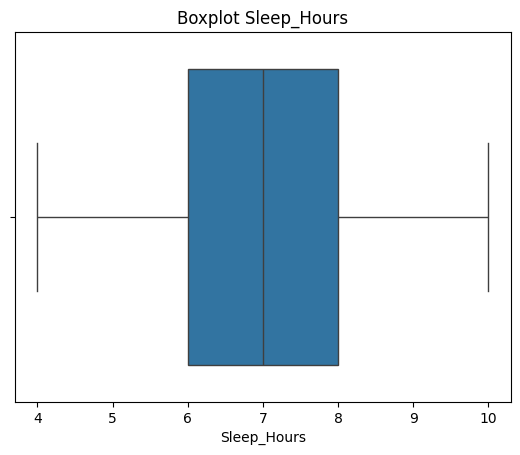

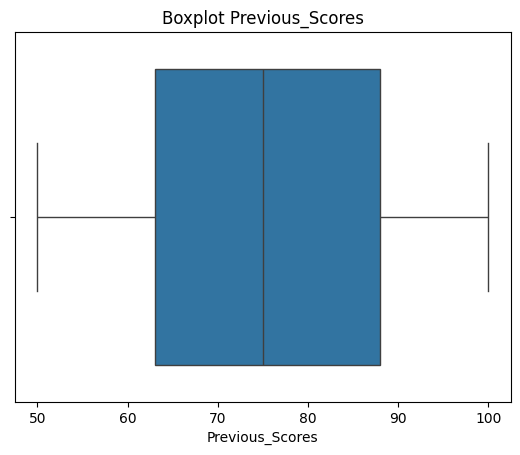

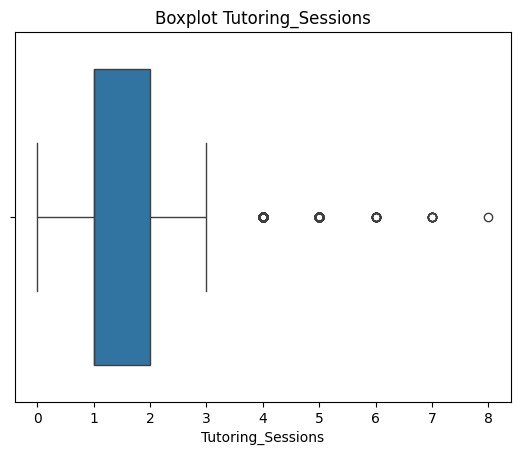

Text(0.5, 1.0, 'Boxplot Exam_Score')

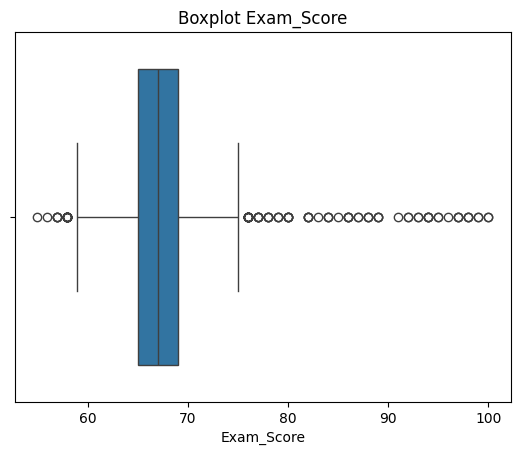

In [13]:
# Deteksi Outliers dari tiap kolom
# Hours_Studied
sns.boxplot(x=df['Hours_Studied']) # Deteksi
plt.title("Boxplot Hours_Studied")
plt.show()

# Attendance
sns.boxplot(x=df['Attendance']) # Deteksi
plt.title("Boxplot Attendance")
plt.show()

# Sleep_Hours
sns.boxplot(x=df['Sleep_Hours']) # Deteksi
plt.title("Boxplot Sleep_Hours")
plt.show()

# Previous_Scores
sns.boxplot(x=df['Previous_Scores']) # Deteksi
plt.title("Boxplot Previous_Scores")
plt.show()

# Tutoring_Sessions
sns.boxplot(x=df['Tutoring_Sessions']) # Deteksi
plt.title("Boxplot Tutoring_Sessions")
plt.show()

# Exam_Score
sns.boxplot(x=df['Exam_Score']) # Deteksi
plt.title("Boxplot Exam_Score")

In [14]:
# Calculate outliers using IQR.
def detect_outliers_iqr(data, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outlier data
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, len(outliers), (len(outliers) / len(df)) * 100  # Jumlah dan persentase outlier

# Calculate the percentage of outliers for expanse and income
outliers_Hours_Studied, count_Hours_Studied, percent_Hours_Studied = detect_outliers_iqr(df, "Hours_Studied")
outliers_Attendance, count_Attendance, percent_Attendance = detect_outliers_iqr(df, "Attendance")
outliers_Sleep_Hours, count_Sleep_Hours, percent_Sleep_Hours = detect_outliers_iqr(df, "Sleep_Hours")
outliers_Previous_Scores, count_Previous_Scores, percent_Previous_Scores = detect_outliers_iqr(df, "Previous_Scores")
outliers_Tutoring_Sessions, count_Tutoring_Sessions, percent_Tutoring_Sessions = detect_outliers_iqr(df, "Tutoring_Sessions")
outliers_Exam_Score, count_Exam_Score, percent_Exam_Score = detect_outliers_iqr(df, "Exam_Score")

# Display the percentage of outliers in expanse and income results
print(f"Outlier Hours Studied: {count_Hours_Studied} data ({percent_Hours_Studied:.2f}%)")
print(f"Outlier Attendance: {count_Attendance} data ({percent_Attendance:.2f}%)")
print(f"Outlier Sleep Hours: {count_Sleep_Hours} data ({percent_Sleep_Hours:.2f}%)")
print(f"Outlier Previous Scores: {count_Previous_Scores} data ({percent_Previous_Scores:.2f}%)")
print(f"Outlier Tutoring Sessions: {count_Tutoring_Sessions} data ({percent_Tutoring_Sessions:.2f}%)")
print(f"Outlier Exam Score: {count_Exam_Score} data ({percent_Exam_Score:.2f}%)")

Outlier Hours Studied: 40 data (0.63%)
Outlier Attendance: 0 data (0.00%)
Outlier Sleep Hours: 0 data (0.00%)
Outlier Previous Scores: 0 data (0.00%)
Outlier Tutoring Sessions: 423 data (6.63%)
Outlier Exam Score: 103 data (1.61%)


Penanganan Outlier

In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers_iqr(df, 'Hours_Studied')
df = remove_outliers_iqr(df,'Exam_Score')

In [16]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

## Train Model

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: ", {len(X_train)})
print(f"Test: ", {len(X_test)})

Train:  {4998}
Test:  {1250}


In [18]:
import joblib
# Simpan kolom saat training
joblib.dump(X_train.columns, "feature_Exam-Score.pkl")

['feature_Exam-Score.pkl']

In [19]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "LinearRegression": LinearRegression(),
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(random_state=42)
}

## Evaluation Model

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

for model_name, model in models.items():
    model.fit(X_train,y_train)

for model_name, model in models.items():
    print(f"Model: {model_name}")
    predictions = model.predict(X_test)
    print(f"Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
    print(f"Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
    print(f"R² Score:", r2_score(y_test, predictions))
    print("=" * 50)


Model: LinearRegression
Mean Squared Error (MSE): 0.09877569308246717
Mean Absolute Error (MAE): 0.2655293024323372
R² Score: 0.9905085431561607
Model: XGBRegressor
Mean Squared Error (MSE): 0.4286406338214874
Mean Absolute Error (MAE): 0.5123551487922668
R² Score: 0.9588114619255066
Model: RandomForestRegressor
Mean Squared Error (MSE): 1.1437951199999998
Mean Absolute Error (MAE): 0.8529359999999997
R² Score: 0.8900915632086712


Best Model Selection

In [21]:
best_model = models['LinearRegression']

# Prediksi training
y_train_pred = best_model.predict(X_train)
train_MSE = mean_squared_error(y_train, y_train_pred)
train_MAE = mean_absolute_error(y_train, y_train_pred)
train_R2  = r2_score(y_train, y_train_pred)

# Prediksi testing
y_test_pred = best_model.predict(X_test)
test_MSE = mean_squared_error(y_test, y_test_pred)
test_MAE = mean_absolute_error(y_test, y_test_pred)
test_R2  = r2_score(y_test,y_test_pred)

# Metriks
print("Mean Squared Error")
print(f"MSE Training: {train_MSE:.4f}")
print(f"MSE Testing: {test_MSE:.4f}")
print("---")
print("Mean Absulote Error")
print(f"MAE Training: {train_MAE:.4f}")
print(f"MAE Testing: {test_MAE:.4f}")
print("---")
print("R2")
print(f"R2 Training: {train_R2:.4f}")
print(f"R2 Testing: {test_R2:.4f}")

Mean Squared Error
MSE Training: 0.0995
MSE Testing: 0.0988
---
Mean Absulote Error
MAE Training: 0.2671
MAE Testing: 0.2655
---
R2
R2 Training: 0.9906
R2 Testing: 0.9905


In [22]:
best_model.fit(X_train, y_train)
best_model.score(X_test, y_test)

0.9905085431561607

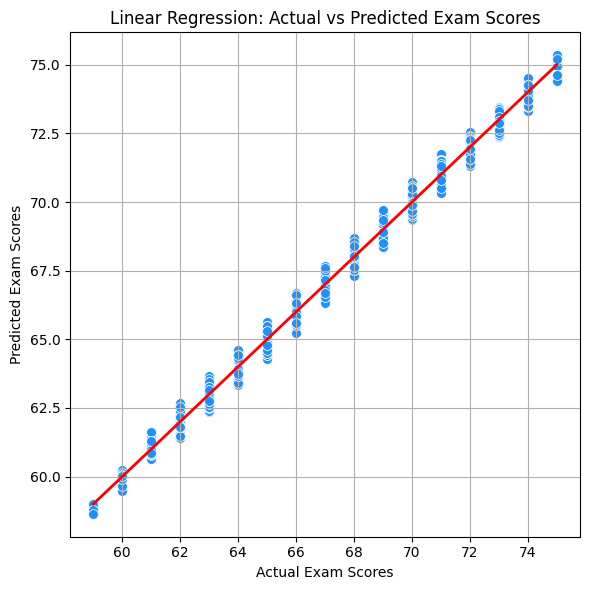

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=2)  # Garis y = x

plt.title("Linear Regression: Actual vs Predicted Exam Scores")
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.grid(True)
plt.tight_layout()
plt.show()


Predict

In [24]:
# prediksi data baru
sample_data = pd.DataFrame({
    'Hours_Studied': [27],
    'Attendance': [92],
    'Parental_Involvement': [0],
    'Access_to_Resources': [2],
    'Extracurricular_Activities': [1],
    'Sleep_Hours': [6],
    'Previous_Scores': [90],
    'Motivation_Level': [2],
    'Internet_Access': [1],
    'Tutoring_Sessions': [4],
    'Family_Income': [1],
    'Teacher_Quality': [2],
    'School_Type': [1],
    'Peer_Influence': [2],
    'Physical_Activity': [2],
    'Learning_Disabilities': [0],
    'Parental_Education_Level': [1],
    'Distance_from_Home': [2],
    'Gender': [1]
})
feature_target = joblib.load("feature_Exam-Score.pkl")
sample_data = sample_data[feature_target]

# Prediksi skor ujian
prediction = best_model.predict(sample_data)

print(f"\nPredicted Exam Score: {prediction[0]:.2f}")


Predicted Exam Score: 75.37


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X_train, y_train, scoring='r2', cv=5)
print(f"R² cross-validation mean: {scores.mean():.4f}, std: {scores.std():.4f}")


R² cross-validation mean: 0.9905, std: 0.0005


In [30]:
from joblib import dump

dump(model, 'regression_Exam.pkl')

['regression_Exam.pkl']

In [27]:
X.to_csv('Fitur.csv', index=False)